# 중고차 가격 예측

In [462]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# 데이터를 학습용과 테스트용으로 분리
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# 평균 제곱 오차 계산
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib as mpl

#폰트 지정
from matplotlib import rcParams
rcParams['font.family'] = 'Noto Sans KR'
rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
dt = pd.read_csv('data3/Dubizzle_used_car_sales.csv')



In [463]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   int64  
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9889 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9970 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emirate              

# 중고차 테이블 컬럼 설명

<details>
<summary>컬럼 소개 </summary>

| 컬럼명                    | 의미                                      |
| ---------------------- | --------------------------------------- |
| `title`                | 차량 전체 명칭 (제조사 + 모델 + 트림 등)              |
| `price_in_aed` **target**   | 차량 가격 (단위: UAE 디르함 AED)                 |
| `kilometers`           | 주행 거리 (단위: km)                          |
| `body_condition`       | 외관 상태 설명 (예: Perfect inside and out)    |
| `mechanical_condition` | 기계적 상태 설명 (예: Perfect inside and out)   |
| `seller_type`          | 판매자 유형 (예: Dealer, Owner 등)             |
| `body_type`            | 차량 차종 (예: SUV, Sedan 등)                 |
| `no_of_cylinders`      | 엔진 실린더 개수                               |
| `transmission_type`    | 변속기 종류 (예: Automatic Transmission)      |
| `regional_specs`       | 지역 사양 (예: GCC 사양, 미국 사양 등)              |
| `horsepower`           | 마력 (예: 400 - 500 HP, 또는 Unknown)        |
| `fuel_type`            | 연료 종류 (예: Gasoline, Diesel 등)           |
| `steering_side`        | 운전석 위치 (예: Left Hand Side)              |
| `year`                 | 차량 연식                                   |
| `color`                | 차량 색상                                   |
| `emirate`              | 차량이 등록된 아랍에미리트 지역 (예: Dubai, Sharjah 등) |
| `motors_trim`          | 트림명 또는 세부 사양 (예: GLS, E 300 등)          |
| `company`              | 제조사명 (예: mitsubishi, mercedes-benz 등)   |
| `model`                | 차량 모델명 (예: pajero, e-class 등)           |
| `date_posted`          | 매물 등록 날짜                                |

</details>

In [464]:
sorted(dt['body_condition'].unique())

['A bit of wear & tear, all repaired',
 'No accidents, very few faults',
 'Normal wear & tear, a few issues',
 'Perfect inside and out']

In [465]:
sorted(dt['mechanical_condition'].unique())

['Major faults fixed, small remain',
 'Major faults, all fixed',
 'Minor faults, all fixed',
 'Ongoing minor & major faults',
 'Perfect inside and out']

In [466]:
dt.head(4)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   int64  
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9889 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9970 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emirate              

총데이터수 9970

**Null 값**    
    - 차량 전체 명칭 5개   
    - 엔진 실린더 개수 81개   
    - 차량연식 970개   
    - 트림명 28개   
 

| 컬럼명                    | 의미                                      |
| ---------------------- | --------------------------------------- |
| `title` 분류               | 차량 전체 명칭 (제조사 + 모델 + 트림 등)              |
| `price_in_aed` **target**   | 차량 가격 (단위: UAE 디르함 AED)                 |
| `kilometers` 수치          | 주행 거리 (단위: km)                          |
| `body_condition` 인코딩 필요       | 외관 상태 설명 (예: Perfect inside and out)    |
| `mechanical_condition` 인코딩 필요 | 기계적 상태 설명 (예: Perfect inside and out)   |
| `seller_type` 인코딩 필요         | 판매자 유형 (예: Dealer, Owner 등)             |
| `body_type`   인코딩 필요         | 차량 차종 (예: SUV, Sedan 등)                 |
| `no_of_cylinders` 수치     | 엔진 실린더 개수                               |
| `transmission_type`  인코딩필요  | 변속기 종류 (예: Automatic Transmission)      |
| `regional_specs`       | 지역 사양 (예: GCC 사양, 미국 사양 등)              |
| `horsepower`           | 마력 (예: 400 - 500 HP, 또는 Unknown)        |
| `fuel_type`            | 연료 종류 (예: Gasoline, Diesel 등)           |
| `steering_side`    인코딩 필요    | 운전석 위치 (예: Left Hand Side)              |
| `year`   수치형              | 차량 연식                                   |
| `color`                | 차량 색상                                   |
| `emirate`              | 차량이 등록된 아랍에미리트 지역 (예: Dubai, Sharjah 등) |
| `motors_trim`          | 트림명 또는 세부 사양 (예: GLS, E 300 등)          |
| `company`              | 제조사명 (예: mitsubishi, mercedes-benz 등)   |
| `model`                | 차량 모델명 (예: pajero, e-class 등)           |
| `date_posted`          | 매물 등록 날짜                                |

# null 값처리

In [467]:
import numpy as np

# 데이터프레임 복사
dcpy1 = dt.copy()

# 1. year와 no_of_cylinders → 최빈값으로 대체
year_mode = dcpy1['year'].mode().iloc[0]
cyl_mode = dcpy1['no_of_cylinders'].mode().iloc[0]

dcpy1['year'] = dcpy1['year'].fillna(year_mode)
dcpy1['no_of_cylinders'] = dcpy1['no_of_cylinders'].fillna(cyl_mode)

# 2. horsepower, model, motors_trim → 결측치 있는 행 제거
dcpy1 = dcpy1.dropna(subset=['horsepower', 'model', 'motors_trim'])

# 3. title은 유지 (삭제하지 않음)



# horsepower가 'Unknown'이라는 문자열인 경우를 찾아서 제거

# 원본 horsepower 컬럼에서 Unknown이 있었던 경우 확인
unknown_mask = dt['horsepower'].str.lower().str.strip() == 'unknown'

# 해당 인덱스를 dcpy1에서도 제거
dcpy1 = dcpy1[~unknown_mask]

# 결과 확인: 남은 행 수
dcpy1.shape[0]

# 처리 결과 요약
cleaned_shape = dcpy1.shape[0]
cleaned_shape


C:\Users\Admin\AppData\Local\Temp\ipykernel_10588\2087402624.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dcpy1 = dcpy1[~unknown_mask]


9131

# 이상치값 시각화

In [468]:
# 수치형 변수만 추출
li = dt.select_dtypes(include=['number']).columns.tolist()
li

li_name = {
    'price_in_aed' : '차량가격',
    'kilometers' : '주행거리',
    'year' : '연식'
}

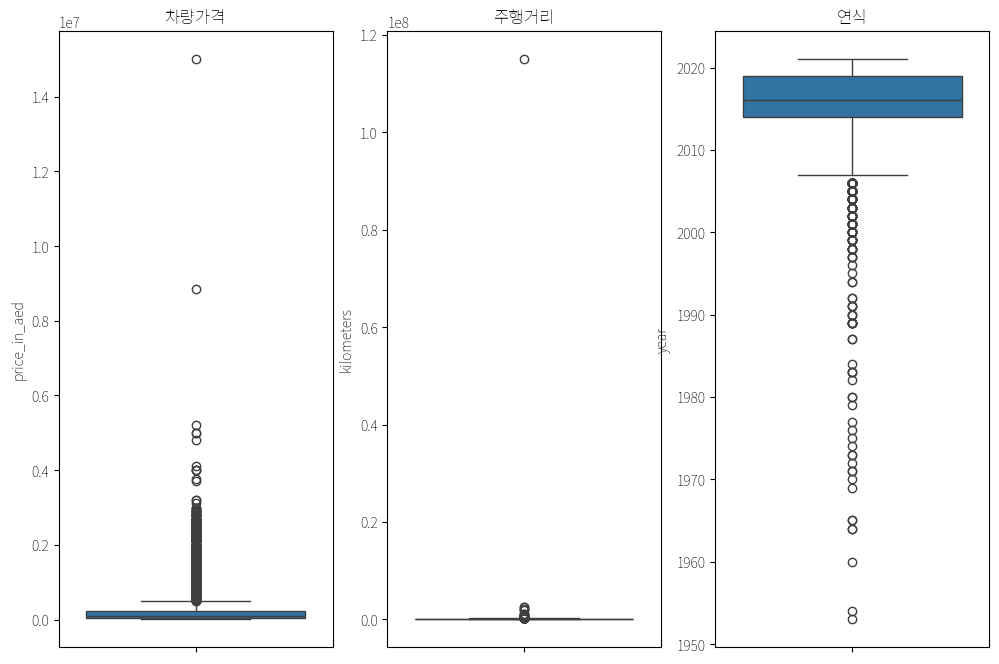

In [469]:
plt.figure(figsize=(12,8))

for i, col in enumerate(li,1):
    plt.subplot(1,3,i)
    sns.boxplot(y=dt[col])
    plt.title(f'{li_name[col]}',fontsize =12)
    
plt.tight_layout
plt.show()

**차량가격
**주행거리** : 1억 2천만 Km는 현실적으로 불가능한 주행거리 삭제가 필요 

In [470]:
# sorted(dt['price_in_aed'].unique(),reverse=True)
sorted(dt['kilometers'].unique(),reverse=True)

[np.int64(115000000),
 np.int64(2559000),
 np.int64(2500000),
 np.int64(2015652),
 np.int64(2000000),
 np.int64(1880000),
 np.int64(1165887),
 np.int64(1160000),
 np.int64(1000000),
 np.int64(666666),
 np.int64(612388),
 np.int64(579000),
 np.int64(530000),
 np.int64(520000),
 np.int64(500000),
 np.int64(488735),
 np.int64(470000),
 np.int64(465172),
 np.int64(451000),
 np.int64(450000),
 np.int64(449968),
 np.int64(430000),
 np.int64(421831),
 np.int64(419063),
 np.int64(416027),
 np.int64(412000),
 np.int64(411918),
 np.int64(410052),
 np.int64(409000),
 np.int64(400000),
 np.int64(399000),
 np.int64(390000),
 np.int64(380000),
 np.int64(379000),
 np.int64(378050),
 np.int64(375000),
 np.int64(372488),
 np.int64(371537),
 np.int64(370865),
 np.int64(370000),
 np.int64(368000),
 np.int64(362450),
 np.int64(361000),
 np.int64(360000),
 np.int64(357000),
 np.int64(356250),
 np.int64(350000),
 np.int64(348000),
 np.int64(343590),
 np.int64(340000),
 np.int64(339000),
 np.int64(335000),
 

In [471]:
dt = dt[dt['price_in_aed'] < 8000000]  # 너무 비싼 가격의 차량은 제거 


In [472]:
dt = dt[dt['kilometers'] < 10000000]  # 예: 100만 km 이상은 제거


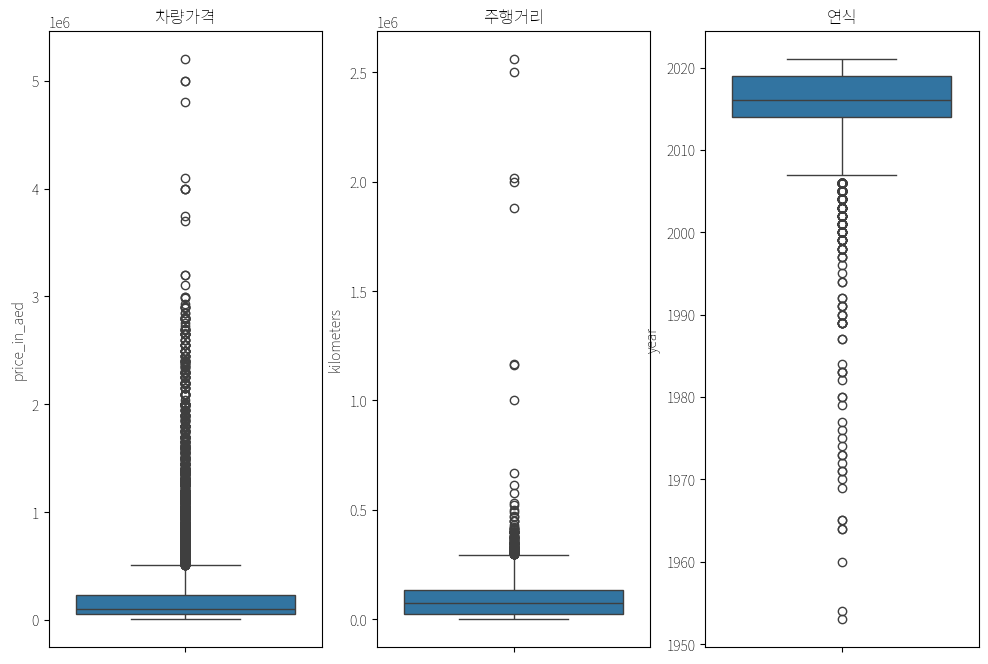

In [473]:
# 이상치 제거 후

plt.figure(figsize=(12,8))

for i, col in enumerate(li,1):
    plt.subplot(1,3,i)
    sns.boxplot(y=dt[col])
    plt.title(f'{li_name[col]}',fontsize =12)
    
plt.tight_layout
plt.show()

# 오브젝트 타입 데이터 전처리 

<details>
<summary>변수 및 인코딩 분류</summary>

| 컬럼명                | 변수 유형 | 추천 인코딩 방식    | 이유 설명 |
|------------------------|------------|----------------------|------------|
| `title`                | 명목형     | 사용하지 않거나 파싱 | 모델에 직접 사용 어려움 (너무 다양함) |
| `body_condition`       | 순서형     | 가중치 인코딩        | 상태가 명확한 순서를 가짐 |
| `mechanical_condition` | 순서형     | 순서 인코딩           | 정비 상태의 질적 수준 존재 |
| `seller_type`          | 명목형     | 원-핫 인코딩          | Dealer vs Owner, 순서 없음 |
| `body_type`            | 명목형     | 가중치 인코딩         | 가격과의 관계 학습 가능, 순서 없음 |
| `no_of_cylinders`      | 순서형     | 정수형 변환 또는 순서 인코딩 | 실린더 수는 수치적 의미 있음 |
| `transmission_type`    | 명목형     | 원-핫 인코딩          | Automatic, Manual 등은 순서 없음 |
| `regional_specs`       | 명목형     | 원-핫 인코딩 또는 가중치 | 가격/수요와 관련될 수 있음 |
| `horsepower`           | 순서형     | 수치 추출 (범위 평균 등) | "400-500 HP" → 450처럼 정수화 추천 |
| `fuel_type`            | 명목형     | 가중치 인코딩         | 가격 차이가 존재, 순서 없음 |
| `steering_side`        | 명목형     | 원-핫 인코딩          | 좌측/우측, 이산적 구분만 있음 |
| `color`                | 명목형     | 원-핫 또는 주색군 통합 | 의미 없을 수 있으나 인기색 고려 가능 |
| `emirate`              | 명목형     | 원-핫 인코딩          | 순서 없음, 지역 구분만 존재 |
| `motors_trim`          | 명목형     | 가중치 인코딩         | 트림에 따라 가격 차이 큼 |
| `company`              | 명목형     | 가중치 인코딩         | 제조사에 따른 가격 차이 반영 |
| `model`                | 명목형     | 가중치 인코딩         | 모델별 가격 차이 큼 |
| `date_posted`          | 날짜형     | 연월 파싱 후 정수화    | 날짜 처리 필요 (연/월 등으로 나누기) |

</details>

In [474]:
dt.select_dtypes(include='object').info()
dt.select_dtypes(include='object').head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 9967 entries, 0 to 9969
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 9962 non-null   object
 1   body_condition        9967 non-null   object
 2   mechanical_condition  9967 non-null   object
 3   seller_type           9967 non-null   object
 4   body_type             9967 non-null   object
 5   no_of_cylinders       9886 non-null   object
 6   transmission_type     9967 non-null   object
 7   regional_specs        9967 non-null   object
 8   horsepower            9967 non-null   object
 9   fuel_type             9967 non-null   object
 10  steering_side         9967 non-null   object
 11  color                 9967 non-null   object
 12  emirate               9967 non-null   object
 13  motors_trim           9939 non-null   object
 14  company               9967 non-null   object
 15  model                 9967 non-null   objec

,title,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022


## 외관상태(body_condition) 인코딩 

<details>
<summary>body_condition 설명</summary>

| 원본 값                                 | 한국어 의미              | 신뢰도 점수(예시) |
| ------------------------------------ | ------------------- | ---------- |
| `Perfect inside and out`             | 내외관 모두 완벽           | 3 (최상)     |
| `A bit of wear & tear, all repaired` | 약간의 마모 있었으나 모두 수리됨  | 2 (양호)     |
| `No accidents, very few faults`      | 사고는 없고 아주 약간의 결함 있음 | 1 (보통)     |
| `Normal wear & tear, a few issues`   | 일반적인 마모와 몇 가지 문제 있음 | 0 (낮음)     |

<details>

In [475]:
dt['body_condition'].unique()


array(['Perfect inside and out', 'Normal wear & tear, a few issues',
       'A bit of wear & tear, all repaired',
       'No accidents, very few faults'], dtype=object)

### 가중치 고려   
**차의 컨디션 각 속성값이 판매가에 주는 영향이 다를 수 있음**
<details>
<summary>[예시]</summary>    

```Perfect```는 완벽한 상태로 판매가에 큰 영향을 주는 요인일 수 있음.   
반면, ```Normal wear``` 상태는 가격을 크게 깎는 요인일 수도 있음.


→ **이런 경우 단순히 0~3으로 표현하는 것보다 가중치를 조정한 점수 부여가 더 효과적**
</details>    

--

✅ 타깃값(예: price)과의 평균 비교   
각 상태별 평균 가격을 비교하여 가중치 설정  
<details>
<summary>[예시]</summary>

Perfect 차량의 평균 가격이 Normal보다 2배라면, 점수도 2배 부여

</details>

In [476]:
# 더미 변수화
df_dummies = pd.get_dummies(dt[['body_condition']], prefix='', prefix_sep='')
X = df_dummies
y = dt['price_in_aed']

# 회귀 모델 학습
reg = LinearRegression()
reg.fit(X, y)

# 각 상태의 계수 추출
coef = pd.Series(reg.coef_, index=X.columns)

# 계수를 정규화해서 가중치화 (예: min-max 스케일 등)
weights = (coef - coef.min()) / (coef.max() - coef.min())
weights.index = weights.index.str.replace('body_condition_', '')



# 매핑 전 양쪽 모두 소문자 + strip()

dcpy1['body_condition'] = dcpy1['body_condition'].str.lower().str.strip()
weights.index = weights.index.str.lower().str.strip()

weights = weights.to_dict()

# # #가중치 비율에 맞춰 인코딩 
dcpy1['body_condition'] = dcpy1['body_condition'].map(weights).round(2)

dcpy1


,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
1,chevrolet silverado,110000,39000,1.00,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,1.00,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,1.00,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,33000,69000,1.00,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022
5,A7 S-line Quattro. Under Warranty. Accidents F...,98000,84000,1.00,Perfect inside and out,Owner,Sedan,6,Automatic Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,2015.0,Gold,Dubai,S-line,audi,a7,30/04/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,AED7525month | 2015 Land Rover Range Rover Aut...,215000,105777,1.00,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2015.0,White,Dubai,Autobiography,land-rover,range-rover,18/11/2021
9966,LOW MILEAGE Cadillac Escalade Platinum,90000,55640,1.00,Perfect inside and out,Owner,SUV,8,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,White,Dubai,Platinum,cadillac,escalade,11/05/2022
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,679000,100,1.00,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,Other,400 - 500 HP,Gasoline,Left Hand Side,2016.0,Black,Dubai,SVR,land-rover,range-rover-sport,14/12/2021
9968,Chevrolet Malibu GCC Spec,18900,140000,0.17,Perfect inside and out,Owner,Sedan,4,Automatic Transmission,GCC Specs,150 - 200 HP,Gasoline,Left Hand Side,2013.0,White,Dubai,LS,chevrolet,malibu,06/03/2022


# 기계적 상태 설명 (mechanical_condition) -가중치 인코딩

In [477]:
# 1. 더미 변수화 (접두사 제거를 위해 prefix='', prefix_sep='')
mc_dummies = pd.get_dummies(dt[['mechanical_condition']], prefix='', prefix_sep='')

# 2. 회귀 분석 (target은 price_in_aed)
X_mc = mc_dummies
y_mc = dt['price_in_aed']

reg_mc = LinearRegression()
reg_mc.fit(X_mc, y_mc)

# 3. 회귀 계수 추출 및 정규화
mc_weights = pd.Series(reg_mc.coef_, index=X_mc.columns)
mc_weights = (mc_weights - mc_weights.min()) / (mc_weights.max() - mc_weights.min())

# 4. 인덱스 정리 (공백 제거 및 소문자화)
mc_weights.index = mc_weights.index.str.lower().str.strip()

# 5. 원본 데이터도 동일하게 소문자+strip 처리해서 매핑
dcpy1['mechanical_condition'] = dcpy1['mechanical_condition'].str.lower().str.strip().map(mc_weights)



In [478]:
# 결과 일부 확인
dcpy1.head(2)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
1,chevrolet silverado,110000,39000,1.0,1.0,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,1.0,1.0,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022


# 판매자 유형 (seller_type) - 순서 인코딘


In [479]:
# 고유 값 확인
unique_seller = dt['seller_type'].dropna().unique()

# 매핑 딕셔너리 생성
seller_map = {label: idx for idx, label in enumerate(unique_seller)}

# 원본 그대로 사용하여 매핑
dcpy1['seller_type'] = dt['seller_type'].map(seller_map)

# 결과 확인
dcpy1[['seller_type']].head(10)

,seller_type
1,0.0
2,0.0
3,0.0
4,1.0
5,1.0
8,0.0
9,0.0
10,0.0
11,0.0
12,0.0


In [480]:
# 결과 일부 확인
dcpy1.head(10)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
1,chevrolet silverado,110000,39000,1.0,1.0,0.0,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,1.0,1.0,0.0,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,1.0,1.0,0.0,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,33000,69000,1.0,1.0,1.0,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022
5,A7 S-line Quattro. Under Warranty. Accidents F...,98000,84000,1.0,1.0,1.0,Sedan,6,Automatic Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,2015.0,Gold,Dubai,S-line,audi,a7,30/04/2022
8,TOYOTA LC PICKUP FULL OPTION 2022,149000,0,1.0,1.0,0.0,Pick Up Truck,6,Manual Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,2016.0,Beige,Abu Dhabi,70th Anniversary,toyota,land-cruiser-76-series,11/05/2022
9,Warranty | 0 Down payment | Model 2013 | V6 en...,35999,111749,1.0,1.0,0.0,Van,6,Automatic Transmission,North American Specs,200 - 300 HP,Gasoline,Left Hand Side,2013.0,Silver,Dubai,SV,nissan,quest,07/08/2021
10,Audi S8 TFSI quattro 570hp 2020 gcc Under Wa...,389000,50000,1.0,1.0,0.0,Sedan,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2020.0,Grey,Abu Dhabi,Other,audi,s8,24/02/2022
11,"2020 Mercedes G63 | 96,000 KM | GCC Spec | Ava...",750000,96000,1.0,1.0,0.0,SUV,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2020.0,Silver,Dubai,G 63 AMG,mercedes-benz,g-class,12/04/2022
12,*Extended Warranty Available* I Mercedes-Benz ...,329000,31577,1.0,1.0,0.0,Coupe,6,Automatic Transmission,GCC Specs,300 - 400 HP,Gasoline,Left Hand Side,2019.0,White,Dubai,Other,mercedes-benz,cls-class,08/03/2022


# 차량 차종 (body_type) - 가중치 인코딩

In [481]:
# body_type 컬럼은 명목형이고, 가중치 인코딩을 추천함

# 1. 더미 변수화 (prefix 제거)
bt_dummies = pd.get_dummies(dt[['body_type']], prefix='', prefix_sep='')

# 2. 회귀 분석
X_bt = bt_dummies
y_bt = dt['price_in_aed']

reg_bt = LinearRegression()
reg_bt.fit(X_bt, y_bt)

# 3. 계수 추출 및 정규화
bt_weights = pd.Series(reg_bt.coef_, index=X_bt.columns)
bt_weights = (bt_weights - bt_weights.min()) / (bt_weights.max() - bt_weights.min())

# 4. 인덱스 정리
bt_weights.index = bt_weights.index.str.lower().str.strip()

# 5. 원본 정리 및 인코딩 적용
dcpy1['body_type'] = dt['body_type'].str.lower().str.strip().map(bt_weights)


In [482]:
bt_weights

coupe                   0.529469
crossover               0.047343
hard top convertible    1.000000
hatchback               0.000000
other                   0.215459
pick up truck           0.097585
suv                     0.344928
sedan                   0.136232
soft top convertible    0.882126
sports car              0.863768
utility truck           0.326570
van                     0.074396
wagon                   0.326570
dtype: float64

In [483]:
dcpy1.head(10)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
1,chevrolet silverado,110000,39000,1.0,1.0,0.0,0.344928,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,1.0,1.0,0.0,0.136232,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,1.0,1.0,0.0,1.000000,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,33000,69000,1.0,1.0,1.0,0.326570,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022
5,A7 S-line Quattro. Under Warranty. Accidents F...,98000,84000,1.0,1.0,1.0,0.136232,6,Automatic Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,2015.0,Gold,Dubai,S-line,audi,a7,30/04/2022
8,TOYOTA LC PICKUP FULL OPTION 2022,149000,0,1.0,1.0,0.0,0.097585,6,Manual Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,2016.0,Beige,Abu Dhabi,70th Anniversary,toyota,land-cruiser-76-series,11/05/2022
9,Warranty | 0 Down payment | Model 2013 | V6 en...,35999,111749,1.0,1.0,0.0,0.074396,6,Automatic Transmission,North American Specs,200 - 300 HP,Gasoline,Left Hand Side,2013.0,Silver,Dubai,SV,nissan,quest,07/08/2021
10,Audi S8 TFSI quattro 570hp 2020 gcc Under Wa...,389000,50000,1.0,1.0,0.0,0.136232,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2020.0,Grey,Abu Dhabi,Other,audi,s8,24/02/2022
11,"2020 Mercedes G63 | 96,000 KM | GCC Spec | Ava...",750000,96000,1.0,1.0,0.0,0.344928,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2020.0,Silver,Dubai,G 63 AMG,mercedes-benz,g-class,12/04/2022
12,*Extended Warranty Available* I Mercedes-Benz ...,329000,31577,1.0,1.0,0.0,0.529469,6,Automatic Transmission,GCC Specs,300 - 400 HP,Gasoline,Left Hand Side,2019.0,White,Dubai,Other,mercedes-benz,cls-class,08/03/2022


# 엔진 실린더 개수 () - 가중치 인코딩 no_of_cylinders

In [484]:
# no_of_cylinders는 순서형 → 정수형 변환으로 처리

# 먼저 고유값 확인
unique_cyl = dt['no_of_cylinders'].dropna().unique()

# 숫자만 추출하는 함수 정의
def extract_int(value):
    try:
        return int(''.join(filter(str.isdigit, str(value))))
    except:
        return None

# 적용
dcpy1['no_of_cylinders'] = dt['no_of_cylinders'].apply(extract_int)

In [485]:
dcpy1.head(2)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
1,chevrolet silverado,110000,39000,1.0,1.0,0.0,0.344928,8.0,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,1.0,1.0,0.0,0.136232,6.0,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022


# 변속기 종류 (transmission_type) - 순서 인코딩

In [486]:
# transmission_type: 명목형 → 원-핫 인코딩 방식 (정수형 맵핑)

# 고유값 확인 후 순서대로 정수 매핑
unique_trans = dt['transmission_type'].dropna().unique()
trans_map = {label: idx for idx, label in enumerate(unique_trans)}

# 적용
dcpy1['transmission_type'] = dt['transmission_type'].map(trans_map)

In [487]:
dcpy1.head(2)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
1,chevrolet silverado,110000,39000,1.0,1.0,0.0,0.344928,8.0,0.0,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,1.0,1.0,0.0,0.136232,6.0,0.0,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022


# 지역 (regional_specs) - 순서 인코딩 


In [488]:
# regional_specs: 명목형 → 원-핫 인코딩 방식의 정수 맵핑

# 고유값 확인 후 맵핑 딕셔너리 생성
unique_specs = dt['regional_specs'].dropna().unique()
specs_map = {label: idx for idx, label in enumerate(unique_specs)}

# 인코딩 적용
dcpy1['regional_specs'] = dt['regional_specs'].map(specs_map)

In [489]:
dcpy1.head(2)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
1,chevrolet silverado,110000,39000,1.0,1.0,0.0,0.344928,8.0,0.0,1.0,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,1.0,1.0,0.0,0.136232,6.0,0.0,0.0,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022


# 마력 (horsepower) - 가중치 

In [490]:
# 범위 평균 또는 숫자 추출
def parse_horsepower(value):
    try:
        if pd.isna(value) or 'unknown' in str(value).lower():
            return np.nan
        nums = [int(n) for n in str(value).replace('HP', '').split('-') if n.strip().isdigit()]
        if len(nums) == 2:
            return sum(nums) / 2  # 평균
        elif len(nums) == 1:
            return nums[0]
        else:
            return np.nan
    except:
        return np.nan

# 적용
dcpy1['horsepower'] = dcpy1['horsepower'].apply(parse_horsepower)

In [491]:
# 결과 확인
dcpy1.head(2)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
1,chevrolet silverado,110000,39000,1.0,1.0,0.0,0.344928,8.0,0.0,1.0,450.0,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,1.0,1.0,0.0,0.136232,6.0,0.0,0.0,450.0,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022


# 연료 종류 (fuel_type) - 순서 종류

In [492]:
# 1. 더미 변수화
fuel_dummies = pd.get_dummies(dt[['fuel_type']], prefix='', prefix_sep='')

# 2. 회귀 분석
X_fuel = fuel_dummies
y_fuel = dt['price_in_aed']

reg_fuel = LinearRegression()
reg_fuel.fit(X_fuel, y_fuel)

# 3. 계수 추출 및 정규화
fuel_weights = pd.Series(reg_fuel.coef_, index=X_fuel.columns)
fuel_weights = (fuel_weights - fuel_weights.min()) / (fuel_weights.max() - fuel_weights.min())

# 4. 인덱스 정리
fuel_weights.index = fuel_weights.index.str.lower().str.strip()

# 5. 원본 데이터 정리 및 매핑
dcpy1['fuel_type'] = dt['fuel_type'].str.lower().str.strip().map(fuel_weights)


In [493]:
# 결과 확인
dcpy1.head(5)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
1,chevrolet silverado,110000,39000,1.0,1.0,0.0,0.344928,8.0,0.0,1.0,450.0,0.267928,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,1.0,1.0,0.0,0.136232,6.0,0.0,0.0,450.0,0.267928,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,1.0,1.0,0.0,1.000000,8.0,0.0,0.0,650.0,0.267928,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,33000,69000,1.0,1.0,1.0,0.326570,4.0,1.0,0.0,NaN,0.267928,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022
5,A7 S-line Quattro. Under Warranty. Accidents F...,98000,84000,1.0,1.0,1.0,0.136232,6.0,0.0,0.0,250.0,0.267928,Left Hand Side,2015.0,Gold,Dubai,S-line,audi,a7,30/04/2022


# 운전석 위치 (steering_side) - 순서 인코딩 

In [494]:
# steering_side: 명목형 → 원-핫 인코딩 방식 정수 맵핑

# 고유값 확인 후 매핑
unique_steering = dt['steering_side'].dropna().unique()
steering_map = {label: idx for idx, label in enumerate(unique_steering)}

# 적용
dcpy1['steering_side'] = dt['steering_side'].map(steering_map)

In [495]:
dcpy1.head(10)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
1,chevrolet silverado,110000,39000,1.0,1.0,0.0,0.344928,8.0,0.0,1.0,450.0,0.267928,0.0,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,1.0,1.0,0.0,0.136232,6.0,0.0,0.0,450.0,0.267928,0.0,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,1.0,1.0,0.0,1.000000,8.0,0.0,0.0,650.0,0.267928,0.0,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,33000,69000,1.0,1.0,1.0,0.326570,4.0,1.0,0.0,NaN,0.267928,0.0,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022
5,A7 S-line Quattro. Under Warranty. Accidents F...,98000,84000,1.0,1.0,1.0,0.136232,6.0,0.0,0.0,250.0,0.267928,0.0,2015.0,Gold,Dubai,S-line,audi,a7,30/04/2022
8,TOYOTA LC PICKUP FULL OPTION 2022,149000,0,1.0,1.0,0.0,0.097585,6.0,1.0,0.0,250.0,0.267928,0.0,2016.0,Beige,Abu Dhabi,70th Anniversary,toyota,land-cruiser-76-series,11/05/2022
9,Warranty | 0 Down payment | Model 2013 | V6 en...,35999,111749,1.0,1.0,0.0,0.074396,6.0,0.0,1.0,250.0,0.267928,0.0,2013.0,Silver,Dubai,SV,nissan,quest,07/08/2021
10,Audi S8 TFSI quattro 570hp 2020 gcc Under Wa...,389000,50000,1.0,1.0,0.0,0.136232,8.0,0.0,0.0,550.0,0.267928,0.0,2020.0,Grey,Abu Dhabi,Other,audi,s8,24/02/2022
11,"2020 Mercedes G63 | 96,000 KM | GCC Spec | Ava...",750000,96000,1.0,1.0,0.0,0.344928,8.0,0.0,0.0,550.0,0.267928,0.0,2020.0,Silver,Dubai,G 63 AMG,mercedes-benz,g-class,12/04/2022
12,*Extended Warranty Available* I Mercedes-Benz ...,329000,31577,1.0,1.0,0.0,0.529469,6.0,0.0,0.0,350.0,0.267928,0.0,2019.0,White,Dubai,Other,mercedes-benz,cls-class,08/03/2022


# 차량 색상 (color) - 순서 인코딩

In [496]:
# color: 명목형 → 원-핫 인코딩 방식 정수 매핑

# 고유값 확인 후 매핑
unique_colors = dt['color'].dropna().unique()
color_map = {label: idx for idx, label in enumerate(unique_colors)}

# 적용
dcpy1['color'] = dt['color'].map(color_map)

# 차량이 등록된 아랍에미리트 지역 (emirate) - 순서 인코딩


In [497]:
# 고유값 확인 후 매핑
unique_emirate = dt['emirate'].dropna().unique()
emirate_map = {label: idx for idx, label in enumerate(unique_emirate)}

# 적용
dcpy1['emirate'] = dt['emirate'].map(emirate_map)

# 제조사명 (company) - 원-핫 인코딩

In [498]:
# 고유값 확인 후 정수 매핑 딕셔너리 생성
unique_companies = dt['company'].dropna().unique()
company_map = {label: idx for idx, label in enumerate(unique_companies)}

# 적용
dcpy1['company'] = dt['company'].map(company_map)

# 차량 모델명 (model) - 계층적 이중 군집화 (Hierarchical Dual Clustering) 후 인코딩

In [499]:
from sklearn.cluster import KMeans

# 모델 평균 가격 기준 제조사별 KMeans 이중 군집화
dt['company_clean'] = dt['company'].astype(str).str.lower().str.strip()
dt['model_clean'] = dt['model'].astype(str).str.lower().str.strip()

# 군집 결과 저장용 딕셔너리
model_cluster_labels = {}

# 4. 제조사별 모델 평균 가격으로 클러스터링
for brand, group in dt.groupby('company_clean'):
    # 모델별 평균 가격
    model_prices = group.groupby('model_clean')['price_in_aed'].mean().dropna()
    
    # 모델 수가 충분할 때만 클러스터링
    if len(model_prices) >= 3:
        X = model_prices.values.reshape(-1, 1)
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X)
        
        # 결과 저장
        for model_name, cluster_id in zip(model_prices.index, clusters):
            model_cluster_labels[(brand, model_name)] = cluster_id

# 5. 최종 군집 결과를 dt에 반영
dt['model_price_cluster'] = dt.apply(
    lambda row: model_cluster_labels.get(
        (str(row['company']).lower().strip(), str(row['model']).lower().strip()), 
        np.nan
    ), axis=1
)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:14

In [500]:
# 결과 일부 확인
dcpy1['model'] = dt['model_price_cluster']

dt

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,...,year,color,emirate,motors_trim,company,model,date_posted,company_clean,model_clean,model_price_cluster
0,MITSUBISHI PAJERO 3.5L / 2013,26000,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,...,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022,mitsubishi,pajero,0.0
1,chevrolet silverado,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,...,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022,chevrolet,silverado,2.0
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,...,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022,mercedes-benz,e-class,0.0
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,...,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022,ferrari,488-spider,2.0
4,USED RENAULT DOKKER 2020,33000,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,...,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022,renault,dokker,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,AED7525month | 2015 Land Rover Range Rover Aut...,215000,105777,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,GCC Specs,...,2015.0,White,Dubai,Autobiography,land-rover,range-rover,18/11/2021,land-rover,range-rover,1.0
9966,LOW MILEAGE Cadillac Escalade Platinum,90000,55640,Perfect inside and out,Perfect inside and out,Owner,SUV,8,Automatic Transmission,GCC Specs,...,2014.0,White,Dubai,Platinum,cadillac,escalade,11/05/2022,cadillac,escalade,1.0
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,679000,100,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,Other,...,NaN,Black,Dubai,SVR,land-rover,range-rover-sport,14/12/2021,land-rover,range-rover-sport,1.0
9968,Chevrolet Malibu GCC Spec,18900,140000,"No accidents, very few faults",Perfect inside and out,Owner,Sedan,4,Automatic Transmission,GCC Specs,...,2013.0,White,Dubai,LS,chevrolet,malibu,06/03/2022,chevrolet,malibu,0.0


# 트림명 또는 세부 사양 (motors_trim) - 가중치 인코딩



In [501]:
# dt 기준으로 제조사-모델-트림별 클러스터 생성
trim_cluster_labels = {}

dt['trim_clean'] = dt['motors_trim'].astype(str).str.lower().str.strip()


for (brand, model), group in dt.groupby(['company_clean', 'model_clean']):
    trim_prices = group.groupby('trim_clean')['price_in_aed'].mean().dropna()
    if len(trim_prices) >= 3:
        X = trim_prices.values.reshape(-1, 1)
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X)
        for trim_name, cluster_id in zip(trim_prices.index, clusters):
            trim_cluster_labels[(brand, model, trim_name)] = cluster_id

# dt에 클러스터 결과 반영
dt['trim_cluster'] = dt.apply(
    lambda row: trim_cluster_labels.get(
        (str(row['company']).lower().strip(),
         str(row['model']).lower().strip(),
         str(row['motors_trim']).lower().strip()),
        np.nan
    ), axis=1
)

# dcpy1에 복사
dcpy1['motors_trim'] = dt['trim_cluster']

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:14

In [502]:
# 결측치 채우기

# 1. 각 model별 motors_trim 최빈값 계산 (결측치 제외)
mode_by_model = dcpy1.groupby('model')['motors_trim'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# 2. 결측치 위치 확인
missing_idx = dcpy1['motors_trim'].isna()

# 3. 해당 model에 맞는 최빈값으로 결측치 채우기
dcpy1.loc[missing_idx, 'motors_trim'] = dcpy1.loc[missing_idx, 'model'].map(mode_by_model)

# 매물 등록 날짜 (date_posted) - 타입변경



In [503]:
# 1. 자동 포맷 추론 (포맷 명시 없이)
dcpy1['date_posted'] = pd.to_datetime(dcpy1['date_posted'], errors='coerce')

# 2. 파생 변수 생성
dcpy1['year_posted'] = dcpy1['date_posted'].dt.year
dcpy1['month_posted'] = dcpy1['date_posted'].dt.month
dcpy1['dayofweek_posted'] = dcpy1['date_posted'].dt.dayofweek


C:\Users\Admin\AppData\Local\Temp\ipykernel_10588\2382597196.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dcpy1['date_posted'] = pd.to_datetime(dcpy1['date_posted'], errors='coerce')


In [504]:
dcpy1


,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,...,year,color,emirate,motors_trim,company,model,date_posted,year_posted,month_posted,dayofweek_posted
1,chevrolet silverado,110000,39000,1.00,1.0,0.0,0.344928,8.0,0.0,1.0,...,2018.0,1.0,1.0,1.0,1.0,2.0,2022-01-14,2022,1,4
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,1.00,1.0,0.0,0.136232,6.0,0.0,0.0,...,2014.0,2.0,1.0,2.0,2.0,0.0,2022-05-05,2022,5,3
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,1.00,1.0,0.0,1.000000,8.0,0.0,0.0,...,2018.0,3.0,0.0,0.0,3.0,2.0,2022-04-30,2022,4,5
4,USED RENAULT DOKKER 2020,33000,69000,1.00,1.0,1.0,0.326570,4.0,1.0,0.0,...,2020.0,1.0,0.0,0.0,4.0,0.0,2022-05-13,2022,5,4
5,A7 S-line Quattro. Under Warranty. Accidents F...,98000,84000,1.00,1.0,1.0,0.136232,6.0,0.0,0.0,...,2015.0,4.0,0.0,0.0,5.0,0.0,2022-04-30,2022,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,AED7525month | 2015 Land Rover Range Rover Aut...,215000,105777,1.00,1.0,0.0,0.344928,8.0,0.0,0.0,...,2015.0,1.0,0.0,1.0,21.0,1.0,2021-11-18,2021,11,3
9966,LOW MILEAGE Cadillac Escalade Platinum,90000,55640,1.00,1.0,1.0,0.344928,8.0,0.0,0.0,...,2014.0,1.0,0.0,0.0,14.0,1.0,2022-05-11,2022,5,2
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,679000,100,1.00,1.0,0.0,0.344928,8.0,0.0,2.0,...,2016.0,5.0,0.0,1.0,21.0,1.0,2021-12-14,2021,12,1
9968,Chevrolet Malibu GCC Spec,18900,140000,0.17,1.0,1.0,0.136232,4.0,0.0,0.0,...,2013.0,1.0,0.0,1.0,1.0,0.0,2022-03-06,2022,3,6


# 분석

<details>
<summary>✅ 지금까지의 전처리 정리</summary>

| 전처리 항목    | 처리 방식 요약                              |
| --------- | ------------------------------------- |
| 범주형 변수    | 원-핫 or 가중치 인코딩 (예: 연료, 제조사, 변속기 등)    |
| 고카디널리티 변수 | 제조사-모델-트림 계층적 군집화 후 인코딩               |
| 날짜        | 연/월/요일 파생                             |
| 수치형 결측치   | 최빈값 대체 또는 제거                          |
| 데이터 크기    | 수천\~만 건 이상 (자동차 판매 데이터)               |
| 목표 변수     | `price_in_aed` (수치형, 연속값) → **회귀 문제** |


</details>

<details>
<summary>회귀 모델: 3가지 선정 </summary>

| 모델                           | 장점                              | 단점              | 추천도   |
| ---------------------------- | ------------------------------- | --------------- | ----- |
| **1. RandomForestRegressor** | 범주형/수치형 섞여도 잘 처리, 튜닝 쉬움, 이상치 강건 | 느림, 해석 어려움      | ⭐⭐⭐⭐  |
| **2. XGBoost / LightGBM**    | 예측력 우수, 불균형·결측에도 강함, 중요도 분석 가능  | 파라미터 많음         | ⭐⭐⭐⭐⭐ |
| **3. Ridge / Lasso 회귀**      | 해석 쉬움, 정규화로 과적합 방지              | 비선형/복잡 데이터에는 약함 | ⭐⭐    |

### XGBoostRegressor

이유:
수천 건 이상 대용량 데이터에 적합

범주형 + 수치형 혼합에 강력

군집화/가중치 인코딩된 피처들을 비선형 관계로 잘 학습

피처 중요도 출력 가능 → 해석도 가능

</details>

In [510]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. 특성과 타겟 분리
X = dcpy1.drop(columns=['price_in_aed', 'title', 'date_posted'], errors='ignore')
 # title은 문자열이므로 학습 제외
y = dcpy1['price_in_aed']

# 2. 결측치가 있는 행 제거 (XGBoost는 결측도 어느 정도 처리 가능하나 안전하게 제거)
X = X.dropna()
y = y.loc[X.index]

# 3. 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 모델 정의 및 학습
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# 5. 예측 및 평가
y_pred = xgb_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False).round(2)
r2 = r2_score(y_test, y_pred).round(2)

print(f'rsme(타겟값 기준 오차값/ 단위 다르함) - {rmse} \n r2(모델 정확도) - {r2}' )


rsme(타겟값 기준 오차값/ 단위 다르함) - 108052.17 
 r2(모델 정확도) - 0.93


c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# 과적합 검토 - 교차검증 

In [507]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print("교차검증 R² 평균:", np.mean(cv_scores))
print("교차검증 R² 편차:", np.std(cv_scores))

교차검증 R² 평균: 0.898295306068951
교차검증 R² 편차: 0.017218961507606052


# 하이퍼파라미터 튜닝 (GridSearchCV) 

In [512]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# XGBoost 모델 생성
xgb = XGBRegressor(random_state=42)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# GridSearchCV 정의
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# 학습 실행
grid_search.fit(X, y)

# 최적 파라미터와 점수
best_params = grid_search.best_params_
best_score = grid_search.best_score_

(best_params, best_score)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


({'learning_rate': 0.05,
  'max_depth': 8,
  'n_estimators': 200,
  'subsample': 0.8},
 np.float64(0.903679404967977))